<a href="https://colab.research.google.com/github/SainiManisha/convnet-tutorial/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Library and Packages**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

**Import Dataset**

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print('train_images shape',train_images.shape)
print('train_labels shape',train_labels.shape)

train_images shape (50000, 32, 32, 3)
train_labels shape (50000, 1)


In [0]:
print('test_images shape',test_images.shape)
print('test_labels shape',test_labels.shape)

test_images shape (10000, 32, 32, 3)
test_labels shape (10000, 1)


**Normalize the Data**

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [0]:
print('train_images shape',train_images.shape)
print('test_images shape',test_images.shape)

train_images shape (50000, 32, 32, 3)
test_images shape (10000, 32, 32, 3)


**Change the class Label using one hot encoding**

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
print('train_images shape',train_labels.shape)
print('test_images shape',test_labels.shape)

train_images shape (50000, 10)
test_images shape (10000, 10)


In [0]:
print(train_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


**Build the model for feature extraction**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        name='C1',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), 
                              name='M2'))
model.add(layers.Conv2D(64, (3, 3), 
                        name='C3', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), name='M4'))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu', name='C5'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


![CIFAR 10 CNN](https://github.com/SainiManisha/convnet-tutorial/blob/master/cs2.jpg?raw=true)

**Adding a classifier on top of the convnet**



In [0]:
model.add(layers.Flatten(name='F6'))
model.add(layers.Dense(64, activation='relu', name='FC7'))
model.add(layers.Dense(10, activation='softmax', name='FC8'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 1024)              0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                6

**Compile and run the Model**

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 2.2711 - accuracy: 0.1515
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0755 - accuracy: 0.2436
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9566 - accuracy: 0.2928
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 1.8727 - accuracy: 0.3275
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 1.7797 - accuracy: 0.3633
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 1.6834 - accuracy: 0.3962
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 1.6101 - accuracy: 0.4237
Epoch 8/10
391/391 [==============================] - 2s 4ms/step - loss: 1.5549 - accuracy: 0.4445
Epoch 9/10
391/391 [==============================] - 2s 4ms/step - loss: 1.5065 - accuracy: 0.4610
Epoch 10/10
391/391 [==============================] - 2s 4ms/step - loss: 1.4668 - accuracy: 0.4748

**Evaluate the Model**

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
test_acc

0.48500001430511475

**To improve the accuracy create the second Model1**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        name='C1',
                        input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2), 
                              name='M2'))
model1.add(layers.Conv2D(64, (3, 3), 
                        name='C3', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2), name='M4'))
model1.add(layers.Conv2D(64, (3, 3), 
                        activation='relu', name='C5'))

model1.add(layers.Flatten(name='F6'))
model1.add(layers.Dense(64, activation='relu', name='FC7'))
model1.add(layers.Dense(10, activation='softmax', name='FC8'))

**Compile  and train the Model1**

In [0]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 2s 7ms/step - loss: 1.7591 - accuracy: 0.3512 - val_loss: 1.5133 - val_accuracy: 0.4515
Epoch 2/10
274/274 [==============================] - 2s 6ms/step - loss: 1.4150 - accuracy: 0.4881 - val_loss: 1.3803 - val_accuracy: 0.5017
Epoch 3/10
274/274 [==============================] - 2s 6ms/step - loss: 1.2760 - accuracy: 0.5443 - val_loss: 1.2776 - val_accuracy: 0.5401
Epoch 4/10
274/274 [==============================] - 2s 6ms/step - loss: 1.1784 - accuracy: 0.5823 - val_loss: 1.2461 - val_accuracy: 0.5612
Epoch 5/10
274/274 [==============================] - 2s 6ms/step - loss: 1.1109 - accuracy: 0.6068 - val_loss: 1.1603 - val_accuracy: 0.5909
Epoch 6/10
274/274 [==============================] - 2s 6ms/step - loss: 1.0470 - accuracy: 0.6323 - val_loss: 1.1158 - val_accuracy: 0.6057
Epoch 7/10
274/274 [==============================] - 2s 6ms/step - loss: 0.9994 - accuracy: 0.6478 - val_loss: 1.0812 - val_accuracy: 0.6207
Epoch 

**Evalauate the Model1**

In [0]:
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=0)
test_acc

0.6552000045776367

**Plot the Graph of Accuracy and Loss in case of Model1**





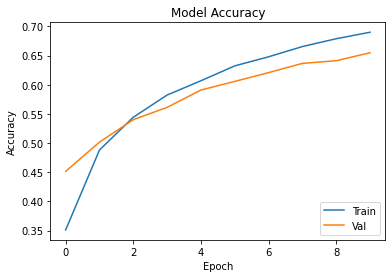

In [0]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Val'],loc='lower right')
plt.show()

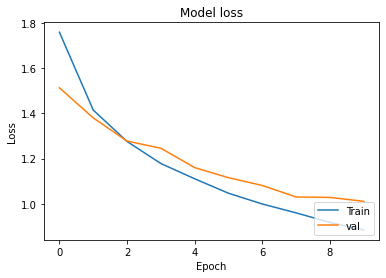

In [0]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend(['Train','val'], loc='lower right')
plt.show()

In [0]:
test_images_ss = test_images[:25]
test_images_ss.shape

(25, 32, 32, 3)

**Save the Model for re-use**

In [0]:
model.save('cifar_model.h5')

**Re-use the saved Model**

In [0]:
from tensorflow.keras.models import load_model
model = load_model('cifar_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 1024)              0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                6

In [0]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.outputs

[<tf.Tensor 'C1_2/Identity:0' shape=(None, 30, 30, 32) dtype=float32>,
 <tf.Tensor 'M2_2/Identity:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'C3_2/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'M4_2/Identity:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'C5_2/Identity:0' shape=(None, 4, 4, 64) dtype=float32>]

In [26]:
sample_test_image = np.expand_dims(train_images[10], axis=0)
sample_test_image.shape

NameError: ignored

In [0]:
activations = activation_model.predict(sample_test_image)
len(activations)

In [0]:
layer_names = [layer.name for layer in model.layers[:5]]
layer_names

In [0]:
col_size = 16

for layer_name, activation in zip(layer_names, activations):
    max_val = activation.max()
    activation /= max_val

    num_filters = activation.shape[-1]
    row_size = num_filters / col_size

    print("\n" * 2)
    print(layer_name)
    plt.figure(figsize=[col_size * 2, row_size * 2])
    for index in range(num_filters):
        plt.subplot(row_size, col_size, index + 1)
        plt.imshow(activation[0, :, :, index])
        plt.axis("off")
    plt.show()

**Predict the class label of the test Images**

In [0]:
cifar_labels = ['airplane', 'automobile', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
i = 0

plt.figure(figsize=[8, 8])	

predicted = model1.predict(test_images_ss)

for	(image,	label) in zip(test_images_ss, predicted):	
	label = np.argmax(label)
	plt.subplot(5, 5, i + 1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(image, cmap=plt.cm.binary)
	plt.xlabel(cifar_labels[label])
	i += 1
plt.suptitle("Predicted Images")
plt.show()

**Confusion Matrix**

In [0]:
!pip install scikit-plot

In [0]:
from scikitplot.metrics import plot_confusion_matrix

logits = model1.predict(test_images)
predicted = np.argmax(logits, axis=-1)

labels = np.argmax(test_labels, axis=-1)
plot_confusion_matrix(labels, predicted)